## $$ Simple \ Linear \ Regression $$ 
- Simple linear regression is the simplest statistical model that assumes a linear relationship between independent and dependent features.
    - Independent variable (x) is predictor/input feature
    - Dependent variable (y) is target/output feature
- Incase of simple linear regression a single independent and dependent feature is involved.
--- 
**Objective :**
- The objective of simple linear regression is to come up with a equation of the line that most accurately predicts the relationship between independent variable (say x)
and dependent/output variable (say y) and it minimizes the difference between the actual data point(y) and predicted data point(y_p) This line is called the `Best Fit Line` 
--- 
**Mathematical Intuition:**
- Let us consider equation of a striaght line:
**$$y_p = \beta 0 +\beta 1x$$**
Where,
-  both $\beta$ 0 & $\beta 1$ are parameters
-  $\beta 0$ is the y-intercept
-  $\beta 1$ is the coefficient of x
-  $y_p$ is the predicted value of y
---

- To find out the best fit line OLS method is used.
- OLS is a statistical method used to identify relationship between dependent and one or more independent features by calculating the values of parameters $\beta 0$ and $\beta 1$ that minimized the sum of square errors.
- Error(Residual) = $\sum(y-y_p)^2$ this is called as the cost function (Cost functions are calculated at the time training of training the model and the objective is to minimize this cost function). To minimize this cost function derivatives with respect to $\beta 0$ and $\beta 1$ is taken this results in equations:

---

differential with respect to $\beta 0$ gives:
$$ \beta 0 =  y_m - \beta 1x_m$$
where,
- y_m is mean of y
- x_m is mean of x

---

- differential with respect to $\beta 1$ gives:

$$
\boxed{\;\beta_1=\frac{n\sum xy-\left(\sum x\right)\left(\sum y\right)}{\,n\sum x^{2}-\left(\sum x\right)^{2}\,}\;}
$$

- Normal Equations for simple Linear Regression is:
    - 1) $n\beta 0 + \sum x\beta 1$ = $\sum y$
    - 2) $\sum x \beta 0 + \sum x^2\beta 1$ = $\sum xy$

Now,
Let us solve a regression problem using the matrix method manually and using Sklearn library and check if we get similar Beta values.

In [33]:
# First Using Manual Matrix Method
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r'/home/harsh-ideapad/Machine_Learning_Notes/Supervised Learning/Regression/DataSet/Simple_Linear_Regression_Salary_dataset.csv').drop('Unnamed: 0',axis=1)

In [3]:
df.head()

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0


In [4]:
independent_feature = np.array([np.ones(len(df['YearsExperience'])),df['YearsExperience']])
dependent_feature = np.array(df['Salary'])
display(independent_feature)
display(dependent_feature)

array([[ 1. ,  1. ,  1. ,  1. ,  1. ,  1. ,  1. ,  1. ,  1. ,  1. ,  1. ,
         1. ,  1. ,  1. ,  1. ,  1. ,  1. ,  1. ,  1. ,  1. ,  1. ,  1. ,
         1. ,  1. ,  1. ,  1. ,  1. ,  1. ,  1. ,  1. ],
       [ 1.2,  1.4,  1.6,  2.1,  2.3,  3. ,  3.1,  3.3,  3.3,  3.8,  4. ,
         4.1,  4.1,  4.2,  4.6,  5. ,  5.2,  5.4,  6. ,  6.1,  6.9,  7.2,
         8. ,  8.3,  8.8,  9.1,  9.6,  9.7, 10.4, 10.6]])

array([ 39344.,  46206.,  37732.,  43526.,  39892.,  56643.,  60151.,
        54446.,  64446.,  57190.,  63219.,  55795.,  56958.,  57082.,
        61112.,  67939.,  66030.,  83089.,  81364.,  93941.,  91739.,
        98274., 101303., 113813., 109432., 105583., 116970., 112636.,
       122392., 121873.])

In [5]:
ind_feat_mat = independent_feature@independent_feature.T
display(ind_feat_mat)
print(f"n = {ind_feat_mat[0][0]}")
print(f"summation of x : {ind_feat_mat[0][1]}")
print(f"Summation of x square : {ind_feat_mat[1][1]}")
ind_feat_mat_inv = np.linalg.inv(ind_feat_mat)

array([[  30.  ,  162.4 ],
       [ 162.4 , 1112.68]])

n = 30.0
summation of x : 162.39999999999998
Summation of x square : 1112.6799999999998


In [6]:
dep_feat_mat = independent_feature@dependent_feature
display(dep_feat_mat)

array([ 2280120. , 14550132.4])

In [7]:
Beta = list(ind_feat_mat_inv@dep_feat_mat)
print(f"B0 : {Beta[0]}, B1:{Beta[1]}")


B0 : 24848.203966523182, B1:9449.962321455083


In [8]:
predicted_salary = Beta[0]+Beta[1]*df['YearsExperience']

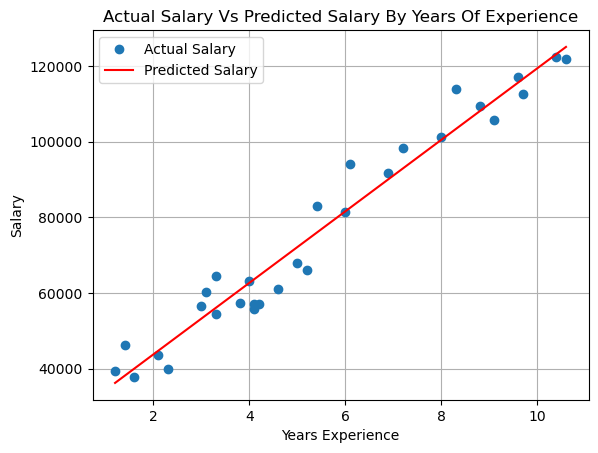

In [9]:
plt.plot(df['YearsExperience'],df['Salary'],'o',label = 'Actual Salary')
plt.plot(df['YearsExperience'],predicted_salary,'r',label = 'Predicted Salary')
plt.xlabel('Years Experience')
plt.ylabel('Salary')
plt.title('Actual Salary Vs Predicted Salary By Years Of Experience')
plt.legend()
plt.grid()

In [34]:
# Now Using Sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
lr = LinearRegression()

In [35]:
X = df[['YearsExperience']]
Y = df[['Salary']]
slx_train,slx_test,sly_train,sly_test = train_test_split(X,Y,test_size = 0.2,random_state = 0)

In [38]:
lr.fit(slx_train,sly_train)

LinearRegression()

In [39]:
print(lr.coef_,lr.intercept_)

[[9312.57512673]] [25849.84163796]


In [40]:
# As we can see the parameter values obtained are approximately the same.